#200 dim
#200 seq length
#10 epoch
#CNN
# Glove WE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from collections import Counter
from keras.models import model_from_json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

/home/mjokhio12/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('msproj/clean_train4.csv')

In [ ]:
class_names = ['Bug', 'Feature', 'Question']

In [ ]:
%%time
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

train_samples = []   
train_labels = []
val_samples = []
val_labels = []

for index, row in train.iterrows():
    train_samples.append(row['text'])
    train_labels.append(row['label'])
    # print(row['text'], row['target'])

for index, row in test.iterrows():
    val_samples.append(row['text'])
    val_labels.append(row['label'])
    # print(row['text'], row['target'])

CPU times: user 33.6 s, sys: 11.9 ms, total: 33.6 s
Wall time: 33.8 s


In [ ]:
print(len(train_samples))
print(len(val_labels))

360000
90000


In [ ]:
# How many unique words have this text
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [ ]:
text_values = train["text"]
counter = counter_word(text_values)
len(counter)

97196

In [ ]:
vocab_size = len(counter)
embedding_dim = 200
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
%%time
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_samples)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_samples)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_samples)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

CPU times: user 26.5 s, sys: 191 ms, total: 26.7 s
Wall time: 26.7 s


In [ ]:
len(tokenizer.index_word)

97197

In [ ]:
print(len(training_sequences))
print(training_padded.shape)

360000
(360000, 200)


In [ ]:
print(len(val_sequences))
print(val_padded.shape)

90000
(90000, 200)


In [ ]:
# import csv

In [ ]:
# # open file for writing, "w" is writing
# w = csv.writer(open("msproj/Clean_data3_WI.csv", "w"))

# # loop over dictionary keys and values
# for key, val in dict(list(word_index.items())).items():

#     # write every key and value to file
#     w.writerow([key, val])

In [ ]:
print(training_sequences[10])

[11, 1656, 2124, 365, 274, 164, 5195, 1656, 66]


In [ ]:
for number in range(5):
    print(len(training_sequences[number]))
    print(len(training_padded[number]))

6
200
13
200
104
200
318
200
38
200


In [ ]:
print(training_sequences[10])

[11, 1656, 2124, 365, 274, 164, 5195, 1656, 66]


In [ ]:
print(training_padded[10])

[  11 1656 2124  365  274  164 5195 1656   66    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
print(training_sequences[0])

[41, 1056, 41, 1056, 1463, 216]


In [ ]:
print(training_padded[0])

[  41 1056   41 1056 1463  216    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
training_padded = np.array(training_padded)
train_labels = np.array(train_labels)
val_padded = np.array(val_padded)
val_labels = np.array(val_labels)

In [ ]:
print(train_labels[0])
print(train_labels[1])
print(train_labels[2])
print(train_labels.shape)

print(val_labels[0])
print(val_labels[1])
print(val_labels[2])
print(val_labels.shape)

1
1
0
(360000,)
0
0
1
(90000,)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_text(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_text(training_padded[10]))
print('---')
print(train_samples[10])

add applicable tax section provide date satisfied applicable option ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
add applicable tax section provide date satisfied applicable option


In [ ]:
%%time
embeddings_index = {}
with open("msproj/embeddings/glove.6B.200d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.
CPU times: user 10.5 s, sys: 556 ms, total: 11 s
Wall time: 12.3 s


Now, let's prepare a corresponding embedding matrix that we can use in a Keras
`Embedding` layer. It's a simple NumPy matrix where entry at index `i` is the pre-trained
vector for the word of index `i` in our `vectorizer`'s vocabulary.

In [ ]:
num_tokens = vocab_size + 2
embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    # print(word)
    # print(i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
p = (hits*100)/vocab_size
print("Percentage of vocabulary matched: ", p)

Converted 67233 words (29964 misses)
Percentage of vocabulary matched:  69.17259969546072


Next, we load the pre-trained word embeddings matrix into an `Embedding` layer.

Note that we set `trainable=False` so as to keep the embeddings fixed (we don't want to
update them during training).

In [ ]:
%%time
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding( num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False )

CPU times: user 11.3 ms, sys: 118 µs, total: 11.4 ms
Wall time: 165 ms


## Build the model

A simple 1D convnet with global max pooling and a classifier at the end.

In [ ]:
%%time
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 200)         19439600  
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         128128    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         82048 

## Train the model

First, convert our list-of-strings data to NumPy arrays of integer indices. The arrays
are right-padded.

We use categorical crossentropy as our loss since we're doing softmax classification.
Moreover, we use `sparse_categorical_crossentropy` since our labels are integers.

In [ ]:
%%time
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
history =  model.fit(training_padded, train_labels, batch_size=128, epochs=10, validation_data=(val_padded, val_labels))

Epoch 1/10
2813/2813 [==============================] - 123s 43ms/step - loss: 0.7001 - acc: 0.7158 - val_loss: 0.6358 - val_acc: 0.7456
Epoch 2/10
2813/2813 [==============================] - 133s 47ms/step - loss: 0.6293 - acc: 0.7532 - val_loss: 0.6246 - val_acc: 0.7549
Epoch 3/10
2813/2813 [==============================] - 187s 66ms/step - loss: 0.6039 - acc: 0.7657 - val_loss: 0.6611 - val_acc: 0.7468
Epoch 4/10
2813/2813 [==============================] - 187s 66ms/step - loss: 0.5873 - acc: 0.7743 - val_loss: 0.6351 - val_acc: 0.7534
Epoch 5/10
2813/2813 [==============================] - 188s 67ms/step - loss: 0.5739 - acc: 0.7801 - val_loss: 0.6555 - val_acc: 0.7555
Epoch 6/10
2813/2813 [==============================] - 188s 67ms/step - loss: 0.5610 - acc: 0.7860 - val_loss: 0.6738 - val_acc: 0.7549
Epoch 7/10
2813/2813 [==============================] - 188s 67ms/step - loss: 0.5516 - acc: 0.7898 - val_loss: 0.6949 - val_acc: 0.7519
Epoch 8/10
2813/2813 [===================

# evaluate model

In [ ]:
# evaluate model
yhat = model.predict(val_padded)
score = roc_auc_score(val_labels, yhat,multi_class='ovr')
print('ROC AUC: %.3f' % score)

ROC AUC: 0.843


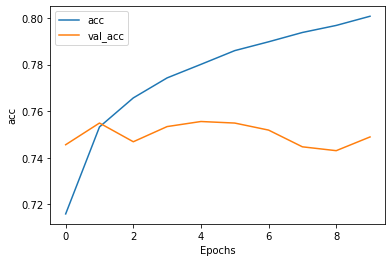

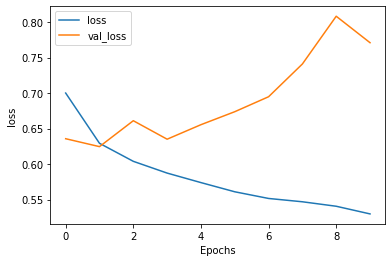

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(train_samples[2])
print(train_labels[2])

create animation create animation texture array ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
inbox sum unread problem count equal unread count language happened time able figure exactly circumstance occurs case seems happening ruby track example unread item hamming unread item anagram one would think mean unread item total ruby counter say click hamming item one one hamming ruby counter decrease also click two anagram item decrease counter well left one anagram item unread zero ruby item unread expect ruby counter instead right screenshot current inbox stand http img may unread count ruby track synced going read submission leave last one submission 

In [ ]:
txt = ["Why binary_crossentropy and categorical_crossentropy give different performances for the same problem"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length,padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['bug', 'feature', 'question']
print(pred, labels[np.argmax(pred)])

[[0.29286933 0.33470452 0.37242612]] question


In [ ]:
def Convert(stng):
  li = []
  li.append(stng)
  return li

In [ ]:
txt = "unable mine rock sark starting today hit enter."

def pred_it(txt):
  seq = tokenizer.texts_to_sequences(txt)
  padded = pad_sequences(seq, maxlen=max_length,padding=padding_type, truncating=trunc_type)
  pred = model.predict(padded)
  labels = [0, 1, 2]
  return labels[np.argmax(pred)]  

In [ ]:
print(Convert(txt))
pred_it(Convert(txt))

['unable mine rock sark starting today hit enter.']


0

## Export an end-to-end model

Now, we may want to export a `Model` object that takes as input a string of arbitrary
length, rather than a sequence of indices. It would make the model much more portable,
since you wouldn't have to worry about the input preprocessing pipeline.

Our `vectorizer` is actually a Keras layer, so it's simple:

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("msproj/Classify_GloVe_WordEmb.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("msproj/Classify_GloVe_WordEmb.h5")
print("Saved model to disk")
 

Saved model to disk


In [ ]:
# load json and create model
json_file = open('msproj/Classify_GloVe_WordEmb.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("msproj/Classify_GloVe_WordEmb.h5")
print("Loaded model from disk")

Loaded model from disk


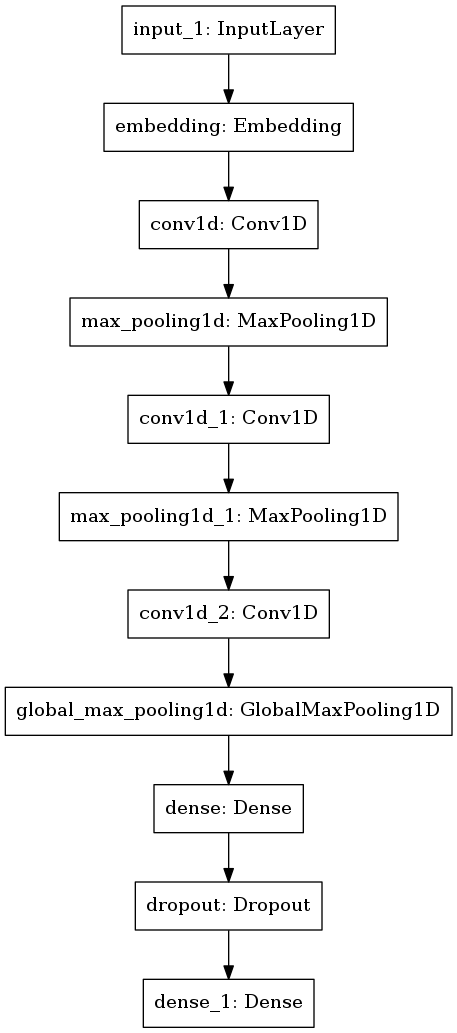

In [ ]:
tf.keras.utils.plot_model(loaded_model)

## Export an end-to-end model

Now, we may want to export a `Model` object that takes as input a string of arbitrary
length, rather than a sequence of indices. It would make the model much more portable,
since you wouldn't have to worry about the input preprocessing pipeline.

Our `vectorizer` is actually a Keras layer, so it's simple:

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("msproj/Classify_GloVe_WordEmb.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("msproj/Classify_GloVe_WordEmb.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# # load json and create model
# json_file = open('msproj/Classify_GloVe_WordEmb.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("msproj/Classify_GloVe_WordEmb.h5")
# print("Loaded model from disk")

In [ ]:
dataset_test = pd.read_csv('msproj/clean_test4.csv')
dataset_test['pred'] = 3
dataset_test

,Unnamed: 0,text,label,pred
0,0,config question path specific environment vari...,0,3
1,1,crash indien vol simulator crash hij vol,0,3
2,2,unable mine rock sark starting today hit enter...,0,3
3,3,whitelists processed create following rule ord...,0,3
4,4,add ctx menu ida free ida free associated dll ...,0,3
...,...,...,...,...
29995,29995,closing project running simulation stop simula...,0,3
29996,29996,missing table description iseries driver table...,0,3
29997,29997,case notification shown new message always cha...,0,3
29998,29998,error syncing see following error log error ja...,0,3


In [ ]:
dst = dataset_test['text'].head(4)
dst

0    config question path specific environment vari...
1             crash indien vol simulator crash hij vol
2    unable mine rock sark starting today hit enter...
3    whitelists processed create following rule ord...
Name: text, dtype: object

In [ ]:
%%time
for item in dst:
  print(pred_it(Convert(item)))

2
0
0
0
CPU times: user 300 ms, sys: 17.2 ms, total: 317 ms
Wall time: 305 ms


In [ ]:
dataset_test['pred']=dataset_test['text'].apply(lambda x: pred_it(Convert(x)))

In [ ]:
dataset_test['pred'].value_counts()

1    15763
0    13348
2      889
Name: pred, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(dataset_test['label'], dataset_test['pred'] ))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62     30000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.44     30000
   macro avg       0.33      0.15      0.21     30000
weighted avg       1.00      0.44      0.62     30000



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dataset_test['label'], dataset_test['pred'])

array([[13348, 15763,   889],
       [    0,     0,     0],
       [    0,     0,     0]])